In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
with sqlite3.connect('../db/products_with_trends.db') as con:
    df= pd.read_sql('SELECT * FROM products_with_trends', con)

In [3]:
df.head(5)

,product_name,brand,categories,labels,packaging,nutriscore_grade,ecoscore_grade,url,sustainability_tags,has_sustainability_tag,date,keyword,value
0,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-08-11,organic,69
1,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-08-18,organic,73
2,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-08-25,organic,74
3,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-09-01,organic,76
4,Douche crème surgras â l'huile de karité,Léa nature,"hygiène, douches et bains, gels douche","bio, testé dermatologiquement, sans sulfates, ...","plastique, bouteille",unknown,unknown,https://world.openbeautyfacts.org/product/3517...,organic,1,2024-09-08,organic,74


<h2>EDA</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            901 non-null    object
 1   brand                   901 non-null    object
 2   categories              901 non-null    object
 3   labels                  901 non-null    object
 4   packaging               901 non-null    object
 5   nutriscore_grade        901 non-null    object
 6   ecoscore_grade          901 non-null    object
 7   url                     901 non-null    object
 8   sustainability_tags     901 non-null    object
 9   has_sustainability_tag  901 non-null    int64 
 10  date                    901 non-null    object
 11  keyword                 901 non-null    object
 12  value                   901 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 91.6+ KB


In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
keyword_stats= df.groupby("keyword")['value'].agg(['mean','median']).reset_index()
keyword_stats

,keyword,mean,median
0,organic,78.169811,78.0
1,vegan,80.792453,79.0


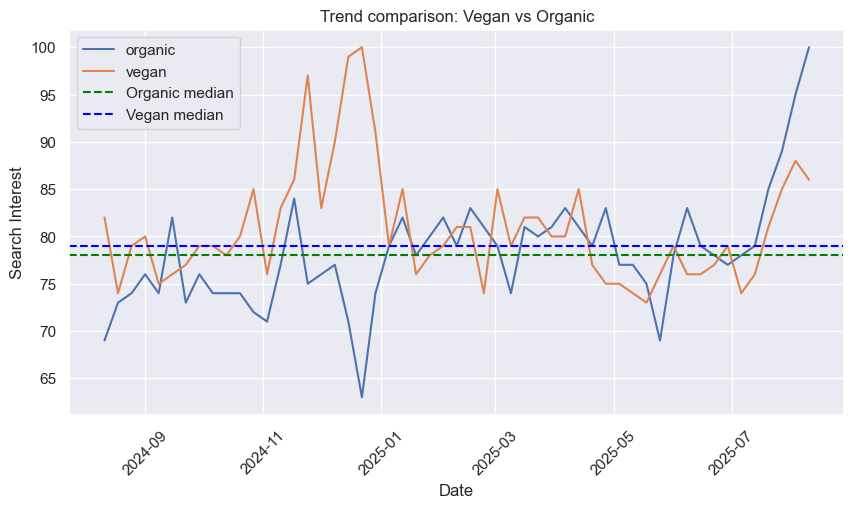

In [11]:
plt.figure(figsize=(10,5))
for kw in df["keyword"].unique():
    subset = df[df["keyword"] == kw].sort_values("date")
    plt.plot(subset["date"], subset["value"], label=kw)


plt.axhline(df[df["keyword"]=="organic"]["value"].median(), color="green", linestyle="--", label="Organic median")
plt.axhline(df[df["keyword"]=="vegan"]["value"].median(), color="blue", linestyle="--", label="Vegan median")
plt.title("Trend comparison: Vegan vs Organic")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.xticks(rotation=45)
plt.show()


/var/folders/dn/6hvnc_t17yg34gpgwcw9ypg00000gn/T/ipykernel_75043/1830565973.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="keyword", y="value", data=df, palette="Set2")


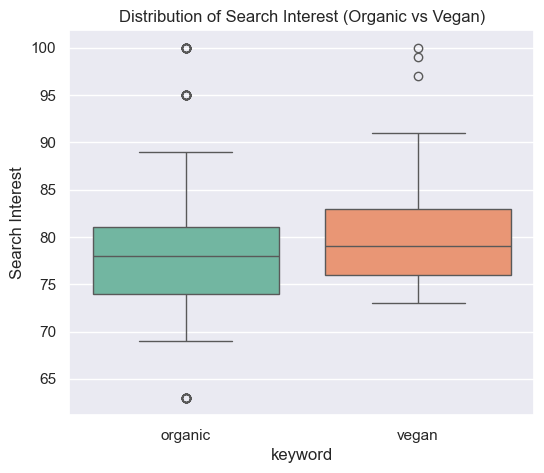

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(x="keyword", y="value", data=df, palette="Set2")
plt.title("Distribution of Search Interest (Organic vs Vegan)")
plt.ylabel("Search Interest")
plt.show()

In [13]:
df.groupby("keyword")["value"].std()

keyword
organic    5.980640
vegan      6.131126
Name: value, dtype: float64

<h2>Overall Popularity</h2>
<p>The median search interest for vegan (80.792453) is slightly higher than organic (78.169811)
vegan products are searched for just a bit more consistently than organic products into this time frame.
</p>

<h2>Implications:</h2>
<p>Both vegan and organic keywords have high overall search interest (70+). The boxplot shows that vegan has a slightly higher and more stable median interest, while organic displays wider variability with both low and high outliers. The standard deviation values (5.98 for organic vs. 6.13 for vegan) show that vegan is actually slightly more volatile numerically, though the difference is minimal. However, organic's variability includes more extreme outliers with sharper dips as well as peaks, while vegan's volatility is more evenly distributed around its higher median. In short, while both keywords fluctuate similarly overall, organic experiences more dramatic swings with external triggers like seasonal demand or media attention, whereas vegan maintains more consistent baseline interest despite having slightly higher statistical variability.
</p>